## Example from [Fitch2019]

In [1]:
%run ../imports.py

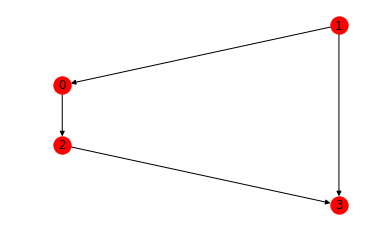

In [2]:
G = nx.DiGraph()
G.add_nodes_from([0,1,2,3])
G.add_edges_from([
    (1,0),
    (0,2),
    (2,3),
    (1,3)
])
N = nx.number_of_nodes(G)
plt.axis('off')
nx.draw_networkx(G, pos=graphviz_layout(G, prog='dot'))

In [3]:
L = out_degree_laplacian(G)
np.linalg.matrix_rank(L)

3

### Symmetrization

In [4]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [5]:
Q

matrix([[-4.6471e-01,  7.2566e-01,  2.0375e-01, -4.6471e-01],
        [ 1.8452e-01,  4.7267e-01, -8.4172e-01,  1.8452e-01],
        [-7.0711e-01,  5.5511e-17, -2.2204e-16,  7.0711e-01]])

Create undirected graph from the equivalent Laplacian

In [6]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        eqG.add_edge(i,j,weight=eqL[i,j])

In [7]:
eqL

matrix([[ 0.931 , -0.7759, -0.4138,  0.2586],
        [-0.7759,  1.3966, -0.1552, -0.4655],
        [-0.4138, -0.1552,  1.0172, -0.4483],
        [ 0.2586, -0.4655, -0.4483,  0.6552]])

In [8]:
np.linalg.matrix_rank(eqL)

3

In [9]:
posG, negG = separate_graphs(eqL)

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


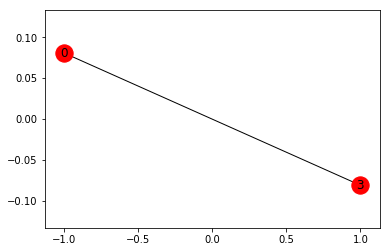

In [10]:
nx.draw_networkx(negG)

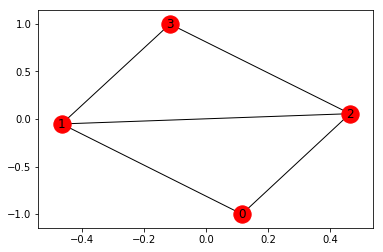

In [11]:
nx.draw_networkx(posG)

In [12]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        if(np.abs(eqL[i,j]) > 1e-6):
            eqG.add_edge(i,j,weight=eqL[i,j])

In [13]:
g_neg = eqG.subgraph([1,2,3,4,5])

In [14]:
np.linalg.eig(nx.laplacian_matrix(g_neg).todense())

(array([ 0.    , -0.7669, -1.3711]), matrix([[-0.5774, -0.6968, -0.4256],
         [-0.5774,  0.717 , -0.3906],
         [-0.5774, -0.0202,  0.8162]]))

In [15]:
nx.laplacian_matrix(g_neg).todense()

matrix([[-0.6207,  0.1552,  0.4655],
        [ 0.1552, -0.6034,  0.4483],
        [ 0.4655,  0.4483, -0.9138]])

In [16]:
np.divide(x,eqL)

matrix([[ 1.089 , -0.0895,  0.5035, -3.3833],
        [-0.0895,  0.3282,  1.7006,  0.5669],
        [ 0.5035,  1.7006,  0.5598,  0.2169],
        [-3.3833,  0.5669,  0.2169,  1.8867]])

In [17]:
L

matrix([[ 1,  0, -1,  0],
        [-1,  2,  0, -1],
        [ 0,  0,  1, -1],
        [ 0,  0,  0,  0]], dtype=int64)

In [18]:
eqL

matrix([[ 0.931 , -0.7759, -0.4138,  0.2586],
        [-0.7759,  1.3966, -0.1552, -0.4655],
        [-0.4138, -0.1552,  1.0172, -0.4483],
        [ 0.2586, -0.4655, -0.4483,  0.6552]])